In [1]:
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import pickle

[INFO][2023-02-19 23:47:52 - Mod: 994321352 - Func: <cell line: 2> - Line: 2]: Loading preprocessed results dataframes
/Users/brunofbessa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


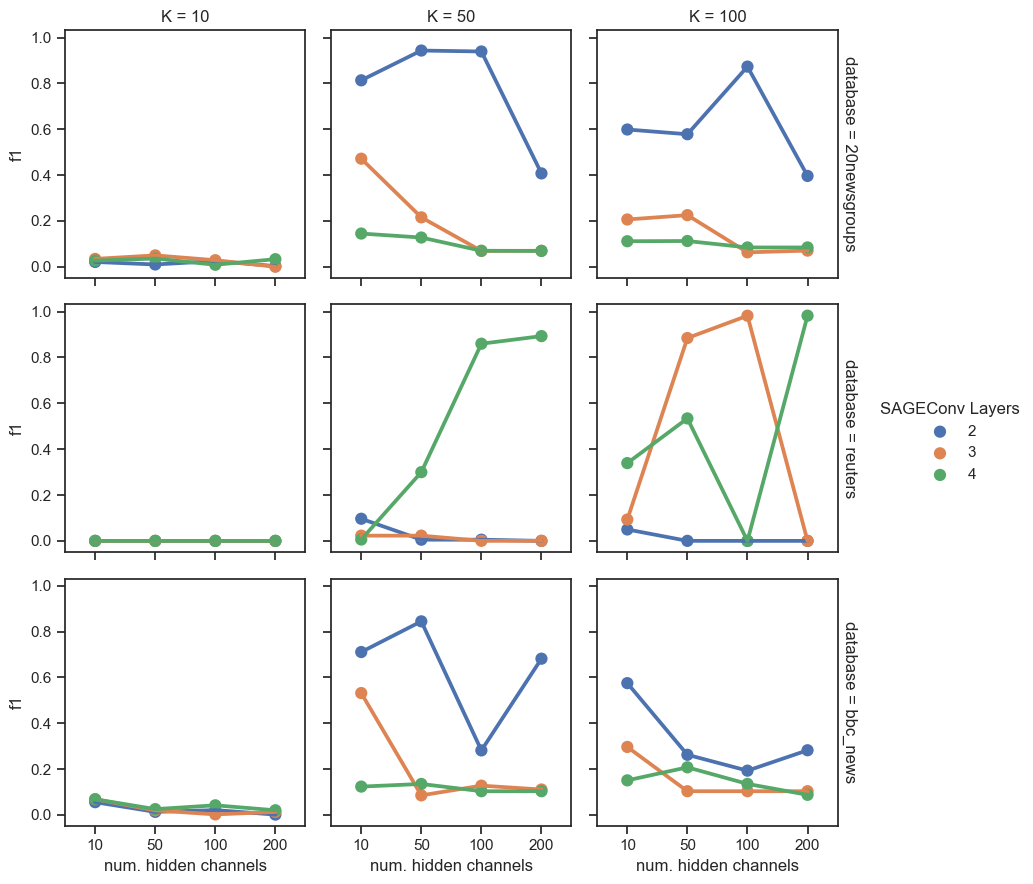

In [155]:
seed_everything(seed=42)
logger.info("Loading preprocessed results dataframes")

with open('./pickle_objects/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)
    
df_all_experiments = df_all_experiments.rename(columns={"database_name": "database", "hidden_channels": "num. hidden channels"})

data = df_all_experiments[(df_all_experiments.p_dropout==0.2)]

g = sns.FacetGrid(data, col="K", row="database", hue="num_layers", margin_titles=True, despine=False)
g = (g.map(sns.pointplot, "num. hidden channels", "f1").add_legend(title="SAGEConv Layers"))
g.savefig("./plots/experiments_3_datasets.png")

In [17]:
with open('./pickle_objects/model_20newsgroupsK100_hid_100_layers_2.pickle', 'rb') as f:
    model_20newsgroupsK100_hid_100_layers_2 = pickle.load(f)
    
with open('./pickle_objects/heterodata_pbg_20ng_k100_test.pickle', 'rb') as f:
    heterodata_pbg_20ng_k100_test = pickle.load(f)
    
with open('./pickle_objects/heterodata_pbg_20ng_k100_train.pickle', 'rb') as f:
    heterodata_pbg_20ng_k100_train = pickle.load(f)
    
    
test_model(model_20newsgroupsK100_hid_100_layers_2, heterodata_pbg_20ng_k100_test)
out = model_20newsgroupsK100_hid_100_layers_2(heterodata_pbg_20ng_k100_test.x_dict, heterodata_pbg_20ng_k100_test.edge_index_dict)

In [153]:
metrics = []
for i in range(100):
    f1, acc = test_model(model_20newsgroupsK100_hid_100_layers_2, heterodata_pbg_20ng_k100_test)
    metrics.append([f1, acc])


In [154]:
metrics

[[0.896723879602305, 0.8955823293172691],
 [0.8984293076212737, 0.8973034997131383],
 [0.8915305361244458, 0.8904188181296615],
 [0.8994268439593373, 0.8984509466437177],
 [0.9040089555010136, 0.9024670109007459],
 [0.8954727088168376, 0.8944348823866897],
 [0.9032855807093284, 0.9018932874354562],
 [0.8954631553024567, 0.8938611589213998],
 [0.8973564192682559, 0.8961560527825588],
 [0.8895392282544134, 0.8881239242685026],
 [0.900737773585394, 0.8995983935742972],
 [0.8991830946449838, 0.897877223178428],
 [0.8929706813316742, 0.8921399885255307],
 [0.8943000540463947, 0.8932874354561101],
 [0.9021938329452335, 0.9007458405048766],
 [0.8961794381174482, 0.8950086058519794],
 [0.8984266601182916, 0.8973034997131383],
 [0.8964051359481209, 0.8950086058519794],
 [0.8974083704007249, 0.8961560527825588],
 [0.890288347925042, 0.8886976477337923],
 [0.8961265254451213, 0.8950086058519794],
 [0.8961546032478683, 0.8944348823866897],
 [0.897602178728016, 0.8961560527825588],
 [0.898983255344

In [23]:
len(heterodata_pbg_20ng_k100_test["source"].y)

1743

In [26]:
out.argmax(1)

tensor([1, 0, 1,  ..., 1, 0, 3])

In [27]:
heterodata_pbg_20ng_k100_test["source"].pred = out.argmax(1)

In [43]:
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.nn import to_hetero
from torch_geometric.utils import to_networkx

g = to_networkx(heterodata_pbg_20ng_k100_test.to_homogeneous())
# Networkx seems to create extra nodes from our heterogeneous graph, so I remove them
isolated_nodes = [node for node in g.nodes() if g.out_degree(node) == 0]
[g.remove_node(i_n) for i_n in isolated_nodes]
# Plot the graph
nx.draw(g, with_labels=False, node_size=10, node_color=pred)
plt.show()

NameError: name 'pred' is not defined

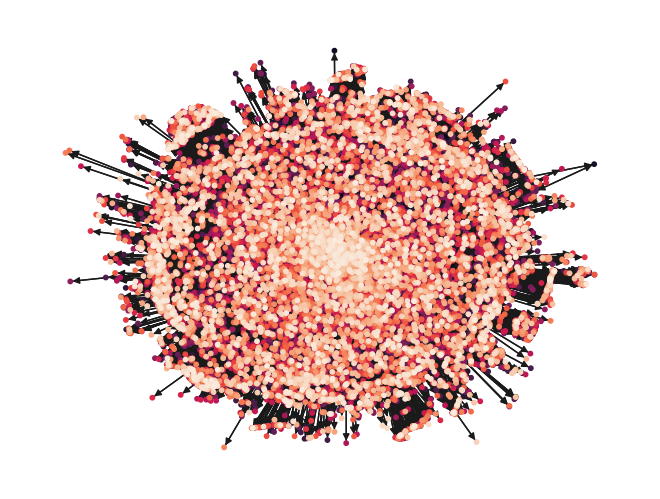

In [44]:
import matplotlib.pyplot as plt
# create number for each group to allow use of colormap
from itertools import count
# get unique groups
groups = set(nx.get_node_attributes(g,'group').values())
mapping = dict(zip(sorted(groups),count()))
nodes = g.nodes()
colors = [mapping[g.nodes[n]['group']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()


pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color=g.pred)

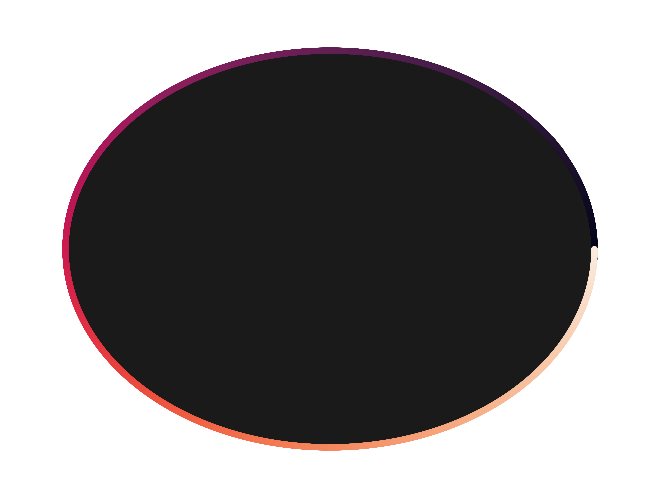

In [53]:
pos = nx.circular_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color=g.pred)

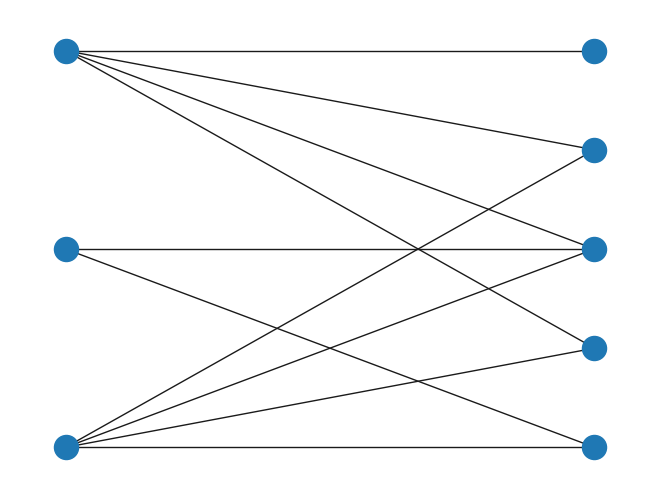

In [47]:
G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)

nx.draw(G, pos)

In [51]:
nx.bipartite.sets(g)[0]

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 1

In [48]:
with open('./pickle_objects/df_all_experiments.pickle', 'rb') as f:
    df_all_experiments = pickle.load(f)


{0, 1, 2}

In [55]:
with open('./pickle_objects/df_experiment_20ng_k10.pickle', 'rb') as f:
    df_experiment_20ng_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_20ng_k50.pickle', 'rb') as f:
    df_experiment_20ng_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_20ng_k100.pickle', 'rb') as f:
    df_experiment_20ng_k100 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k10.pickle', 'rb') as f:
    df_experiment_reuters_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k50.pickle', 'rb') as f:
    df_experiment_reuters_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_reuters_k100.pickle', 'rb') as f:
    df_experiment_reuters_k100 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k10.pickle', 'rb') as f:
    df_experiment_bbc_news_k10 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k50.pickle', 'rb') as f:
    df_experiment_bbc_news_k50 = pickle.load(f)
with open('./pickle_objects/df_experiment_bbc_news_k100.pickle', 'rb') as f:
    df_experiment_bbc_news_k100 = pickle.load(f)





In [56]:
df = df_experiment_20ng_k10


In [64]:
df = df.append(df_experiment_bbc_news_k100,ignore_index=True) 

/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/3124597170.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_experiment_bbc_news_k100,ignore_index=True)


In [66]:
df_all_experiments = df_experiment_20ng_k10
df_all_experiments = df_all_experiments.append(df_experiment_20ng_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_20ng_k100,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k10,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_reuters_k100,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k10,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k50,ignore_index=True)
df_all_experiments = df_all_experiments.append(df_experiment_bbc_news_k100,ignore_index=True)

df_all_experiments = df_all_experiments.rename(columns={"database_name": "database_name_aux"})
df_all_experiments["K"] = df_all_experiments["database_name_aux"].str.replace(".*K=", "").str.replace(" ", "")
df_all_experiments["database_name"] = df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")

df_all_experiments.drop(["database_name_aux"], axis=1)

with open("./pickle_objects/df_all_experiments.pickle", "wb") as f:
    pickle.dump(df_all_experiments, f, pickle.HIGHEST_PROTOCOL)

/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/781722249.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_experiments = df_all_experiments.append(df_experiment_20ng_k50,ignore_index=True)
/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/781722249.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_experiments = df_all_experiments.append(df_experiment_20ng_k100,ignore_index=True)
/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/781722249.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_experiments = df_all_experiments.append(df_experiment_reuters_k10,ignore_index=True)
/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/781722249.py:5: Futu

/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/3858627547.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_experiments["K"] = df_all_experiments["database_name_aux"].str.replace(".*K=", "").str.replace(" ", "")
/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/3858627547.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_experiments["database_name"] = df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")


In [77]:
df_all_experiments

,database_name_aux,hidden_channels,num_layers,p_dropout,loss,f1,acc,epochs,elapsed_time,K,database_name
0,20newsgroups K=10,10,2,0.1,0.185174,0.032714,0.037292,102,7.216,10,20newsgroups
1,20newsgroups K=10,10,2,0.15,0.21485,0.014524,0.020654,82,5.487,10,20newsgroups
2,20newsgroups K=10,10,2,0.2,0.247907,0.021172,0.02467,95,6.42,10,20newsgroups
3,20newsgroups K=10,10,3,0.1,0.478779,0.032246,0.047619,61,6.582,10,20newsgroups
4,20newsgroups K=10,10,3,0.15,0.510572,0.032585,0.046472,76,8.451,10,20newsgroups
...,...,...,...,...,...,...,...,...,...,...,...
319,bbc_news K=100,200,3,0.15,2.210953,0.103667,0.255056,11,17.204,100,bbc_news
320,bbc_news K=100,200,3,0.2,1.719237,0.103667,0.255056,11,16.752,100,bbc_news
321,bbc_news K=100,200,4,0.1,1.602508,0.103667,0.255056,11,24.83,100,bbc_news
322,bbc_news K=100,200,4,0.15,1.605533,0.128053,0.191011,12,27.012,100,bbc_news


In [74]:
df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")

/var/folders/2h/88ywypjd741fxv633b03fmd00000gn/T/ipykernel_1978/601581083.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_experiments["database_name_aux"].str.replace("K=.*", "").str.replace(" ", "")


0      20newsgroups
1      20newsgroups
2      20newsgroups
3      20newsgroups
4      20newsgroups
           ...     
319        bbc_news
320        bbc_news
321        bbc_news
322        bbc_news
323        bbc_news
Name: database_name_aux, Length: 324, dtype: object